# Neuron Tutorial - Modeling Exercises Class 2 - part 2
## Using external inputs to interrogate a model of single neuron

Here we load external inputs to a model neuron to characterize and study its properties.

For this, we need objects to deliver localized perturbation to a neuron, which we call point processes. Today, we will particularly focus on the IClamp that can perform current injection into a neuron --- a simulation of the current clamp experiment.

We first start with importing necessary modules, including neuron:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

We are going to load a model of a cortical pyramidal cell model:

In [2]:
import libcell

cell = libcell.L23()

	0 
	1 
	1 
	1 
	1 


We can inspect the model by using psection:

In [3]:
h.psection()

soma { nseg=7  L=9.26604  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=29.7838}
	insert pas { g_pas=0.000142857 e_pas=-75}
}


1.0

In [4]:
print(cell.dends[:10])
print(cell.soma)

[dend1_1, dend1_11, dend1_111, dend1_1111, dend1_1112, dend1_112, dend1_1121, dend1_1122, dend1_12, dend1_121]
soma


In [5]:
cell.dends[0].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [0.00014285714285714287,
    0.00014285714285714287,
    0.00014285714285714287,
    0.00014285714285714287,
    0.00014285714285714287,
    0.00014285714285714287,
    0.00014285714285714287],
   'e': [-75.0, -75.0, -75.0, -75.0, -75.0, -75.0, -75.0],
   'i': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}},
 'ions': {},
 'morphology': {'L': 4.239810963870551,
  'diam': [2.449559450149536,
   2.449559450149536,
   2.449559450149537,
   2.4495594501495357,
   2.449559450149537,
   2.449559450149537,
   2.449559450149534],
  'pts3d': [(0.0, 0.0, 13.237199783325195, 2.449559450149536),
   (0.07000026851892471,
    0.13999786972999573,
    15.617199897766113,
    2.449559450149536),
   (-0.07000026851892471,
    -0.7700015902519226,
    17.22719955444336,
    2.449559450149536)],
  'parent': soma(1),
  'trueparent': soma(1)},
 'nseg': 7,
 'Ra': 100.0,
 'cm': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'regions': set(),
 'species': set(),
 'name': 'de

Here we load a session file for the virtual current clamp experiment:

In [6]:
h.xopen("iclamp.ses")

nrn_define_shape: soma first and last 3-d point at same (x,y)


1.0

In [7]:
print('Activation onset = {} ms\nDuration = {} ms\nAmplitude = {} nA'.format(
        h.IClamp[0].delay, h.IClamp[0].dur, h.IClamp[0].amp))

h.IClamp[0].delay =  50
h.IClamp[0].dur  = 100
h.IClamp[0].amp = 0.1  # 100 pA

Activation onset = 0.0 ms
Duration = 0.0 ms
Amplitude = 0.0 nA


In [8]:
print('Activation onset = {} ms\nDuration = {} ms\nAmplitude = {} nA'.format(
        h.IClamp[0].delay, h.IClamp[0].dur, h.IClamp[0].amp))

Activation onset = 50.0 ms
Duration = 100.0 ms
Amplitude = 0.1 nA


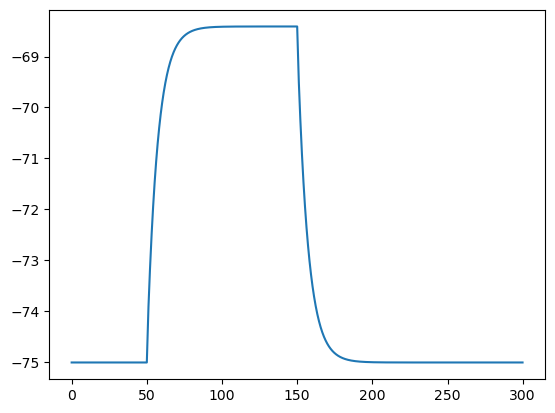

In [9]:
def run(tstop=300):
    """runs a simulation and returns the membrane potential recording at the soma."""
    dt = 0.1 # Again we use 10kHz sampling rate, e.g. 0.1 ms interval
    vrec = h.Vector() # The recording will be saved in this vector
    vrec.record(cell.soma(0.5)._ref_v, dt)
    
    h.v_init = -75
    
    h.tstop = tstop  # Set how long the simulation will run.
    h.init()
    h.run()
    
    return vrec.c() # Should return a copy of the vector

vrec = run()
t = np.arange(vrec.size())*0.1
plt.plot(t, vrec)

# How to locate and move point processes
## 1. How to find out the electrode location
PointProcess.get_segment() returns the segment that a point process is located.


In [10]:
sec = h.IClamp[0].get_segment()
sec

dend2_1211(0.5)

In [11]:
h.distance(sec=cell.soma) # Set an origin to cell.soma(0)
h.distance(h.IClamp[0].get_segment()) # Measure a distance to the origin from the electrode

80.90966752990553

## 2. How to find and get a particular section/segment
Here's how we find all sections and segments in our cell:

h.allsec() yields an iterator to go through all the sections in a model,
Given a section, say sec, sec.allseg() yields an iterator for all segments in sec,
If we know a particular location in terms of the relative coordinate x, we can use sec(x),

Here is an example of going through all segments in a model with showing their distance to the soma:

In [12]:
print('segment , distance')
for sec in h.allsec():
    for seg in sec.allseg():
        segname = '{}({})'.format(sec.name(), seg.x)
        h.distance(sec=cell.soma) # set origin first at the soma
        print(segname, ',', h.distance(seg)) #print segment and distance from the soma

segment , distance
dend1_1(0.0) , 9.266039848327637
dend1_1(0.07142857142857142) , 9.568883488604104
dend1_1(0.21428571428571427) , 10.17457076915704
dend1_1(0.35714285714285715) , 10.780258049709976
dend1_1(0.5) , 11.385945330262912
dend1_1(0.6428571428571429) , 11.991632610815849
dend1_1(0.7857142857142857) , 12.597319891368784
dend1_1(0.9285714285714286) , 13.203007171921719
dend1_1(1.0) , 13.505850812198187
dend1_11(0.0) , 13.505850812198187
dend1_11(0.07142857142857142) , 14.081184123631715
dend1_11(0.21428571428571427) , 15.23185074649877
dend1_11(0.35714285714285715) , 16.382517369365825
dend1_11(0.5) , 17.53318399223288
dend1_11(0.6428571428571429) , 18.683850615099935
dend1_11(0.7857142857142857) , 19.83451723796699
dend1_11(0.9285714285714286) , 20.98518386083404
dend1_11(1.0) , 21.56051717226757
dend1_111(0.0) , 21.56051717226757
dend1_111(0.07142857142857142) , 22.27148950377046
dend1_111(0.21428571428571427) , 23.693434166776242
dend1_111(0.35714285714285715) , 25.11537882

PointProcess.loc(segment) moves the point process to a given segment.

In [13]:
h.IClamp[0].loc(h.dend1_111(0.07142857142857142))

0.07142857142857142

## 3. Example: How to find a segment in `cell` by a name and move our electrode to it.

In [14]:
sec_to_find = [sec for sec in cell.dends if sec.name()=='dend2_12222']
sec_to_find = sec_to_find[0]
sec_to_find

dend2_12222

In [15]:
segs = [seg for seg in sec_to_find.allseg()]
segs

[dend2_12222(0),
 dend2_12222(0.0714286),
 dend2_12222(0.214286),
 dend2_12222(0.357143),
 dend2_12222(0.5),
 dend2_12222(0.642857),
 dend2_12222(0.785714),
 dend2_12222(0.928571),
 dend2_12222(1)]

Then, we move our IClamp to the second segment,

In [16]:
h.IClamp[0].loc(segs[7])

0.9285714285714286

Or, we can move it to a middle segment of the section,

In [17]:
h.IClamp[0].loc(sec_to_find(0.5))

0.5

## 4. How to access variables in sections

You can access a variable defined in a section by (section).(variable name). Also, you can change its value by assignment. It is also possible to access/change a variable only for a segment, if a relative coordinate `x` for the segment is known, by (section)(x).(variable name).

In the following example, we go through all the sections in the model and print the name, `g_pas` (conductance parameter of the passive mechanism), and `nseg`. 

In [18]:
for sec in h.allsec():
    print(sec.name(), sec.g_pas, sec.nseg)

dend1_1 0.00014285714285714287 7
dend1_11 0.00014285714285714287 7
dend1_111 0.00014285714285714287 7
dend1_1111 0.00014285714285714287 7
dend1_1112 0.00014285714285714287 7
dend1_112 0.00014285714285714287 7
dend1_1121 0.00014285714285714287 7
dend1_1122 0.00014285714285714287 7
dend1_12 0.00014285714285714287 7
dend1_121 0.00014285714285714287 7
dend1_1211 0.00014285714285714287 7
dend1_1212 0.00014285714285714287 7
dend1_122 0.00014285714285714287 7
dend1_1221 0.00014285714285714287 7
dend1_1222 0.00014285714285714287 7
dend1_12221 0.00014285714285714287 7
dend1_12222 0.00014285714285714287 7
dend2_1 0.00014285714285714287 7
dend2_11 0.00014285714285714287 7
dend2_111 0.00014285714285714287 7
dend2_1111 0.00014285714285714287 7
dend2_1112 0.00014285714285714287 7
dend2_112 0.00014285714285714287 7
dend2_1121 0.00014285714285714287 7
dend2_1122 0.00014285714285714287 7
dend2_12 0.00014285714285714287 7
dend2_121 0.00014285714285714287 7
dend2_1211 0.00014285714285714287 7
dend2_12111

In [19]:
for sec in h.allsec():
    for seg in sec.allseg():
        h.distance(sec=cell.soma)
        print(sec.name(), h.distance(seg), seg.v)

dend1_1 9.266039848327637 -74.99999999671053
dend1_1 9.568883488604104 -74.99999999671053
dend1_1 10.17457076915704 -74.99999999671053
dend1_1 10.780258049709976 -74.99999999671053
dend1_1 11.385945330262912 -74.99999999671053
dend1_1 11.991632610815849 -74.99999999671053
dend1_1 12.597319891368784 -74.99999999671053
dend1_1 13.203007171921719 -74.99999999671053
dend1_1 13.505850812198187 -74.99999999671053
dend1_11 13.505850812198187 -74.99999999671053
dend1_11 14.081184123631715 -74.99999999671053
dend1_11 15.23185074649877 -74.99999999671053
dend1_11 16.382517369365825 -74.99999999671053
dend1_11 17.53318399223288 -74.99999999671053
dend1_11 18.683850615099935 -74.99999999671053
dend1_11 19.83451723796699 -74.99999999671053
dend1_11 20.98518386083404 -74.99999999671053
dend1_11 21.56051717226757 -74.99999999671053
dend1_111 21.56051717226757 -74.99999999671053
dend1_111 22.27148950377046 -74.99999999671053
dend1_111 23.693434166776242 -74.99999999671053
dend1_111 25.115378829782024 

In [ ]:
h.psection()

Now let's change `g_pas`, the passive conductance, and check the result.

In [ ]:
cell.soma.g_pas = 0.0001
h.psection()